In [133]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard

from time import time



In [134]:
# Loading the data, splitting up into test and trainign set 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print(len(train_images), len(test_images))   #checking original sizes 

In [135]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [136]:
#Setting class names so we can get an overview of the data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

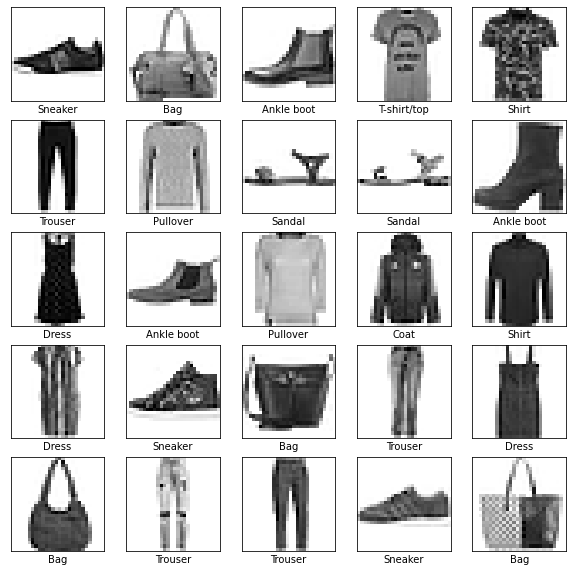

In [137]:

#Plotting a subset of data with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [138]:
#scale to range 0 - 1
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [139]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [140]:
#display_image(22)

In [141]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


In [142]:
print(f"Image shape before: {train_images[1].shape}")

# Pad images with 0s since we want to apply it to LeNet
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

print(f"Updated Image Shape: {train_images[0].shape}.")


Image shape before: (28, 28)
Updated Image Shape: (32, 32).


In [143]:
#display_image(22)

In [144]:
#Model architecture
bl_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


bl_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_18 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_19 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_9 (Flatten)         (None, 576)               0         
                                                                 
 dense_27 (Dense)            (None, 120)              

In [145]:
bl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Setting number of epochs and batch size
EPOCHS = 14
BATCH_SIZE = 128

#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
#train_images.shape
validation_images.shape

X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)

print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])

# of training images: 48000
# of validation images: 12000


In [146]:
#Fitting the model, performing training
bl_history=bl_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 19s 50ms/step - loss: 0.7848 - accuracy: 0.7379 - val_loss: 0.5745 - val_accuracy: 0.8118
Epoch 2/14
375/375 [==============================] - 18s 49ms/step - loss: 0.5351 - accuracy: 0.8204 - val_loss: 0.5248 - val_accuracy: 0.8218
Epoch 3/14
375/375 [==============================] - 18s 49ms/step - loss: 0.4766 - accuracy: 0.8434 - val_loss: 0.4518 - val_accuracy: 0.8581
Epoch 4/14
375/375 [==============================] - 20s 55ms/step - loss: 0.4382 - accuracy: 0.8573 - val_loss: 0.4389 - val_accuracy: 0.8598
Epoch 5/14
375/375 [==============================] - 20s 54ms/step - loss: 0.4138 - accuracy: 0.8661 - val_loss: 0.4309 - val_accuracy: 0.8575
Epoch 6/14
375/375 [==============================] - 29s 77ms/step - loss: 0.3930 - accuracy: 0.8717 - val_loss: 0.3925 - val_accuracy: 0.8753
Epoch 7/14
375/375 [==============================] - 19s 50ms/step - loss: 0.3801 - accuracy: 0.8755 - val_loss: 0.3796 - val_accuracy:

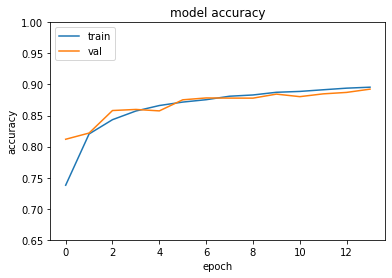

In [196]:
#Plotting the accuracy
plt.plot(bl_history.history['accuracy'])
plt.plot(bl_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

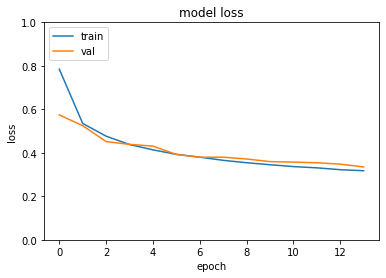

In [189]:
#Plotting the loss
plt.plot(bl_history.history['loss'])
plt.plot(bl_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

In [149]:
#Getting the score from the testing
bl_score = bl_model.evaluate(test_images, to_categorical(test_labels))
print('Baseline model test loss:', bl_score[0])
print('Baseline model test accuracy:', bl_score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.3458 - accuracy: 0.8856
Test loss: 0.3458171784877777
Test accuracy: 0.8855999708175659


In [150]:
bl_model.save("bl_model")

INFO:tensorflow:Assets written to: my_model/assets


In [152]:
#Model2 DropOut model architecture
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [159]:
dropout_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_24 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_25 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_12 (Flatten)        (None, 576)               0         
                                                                 
 dense_36 (Dense)            (None, 120)             

In [154]:
dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
dropout_history=dropout_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 21s 53ms/step - loss: 0.9045 - accuracy: 0.6901 - val_loss: 0.6180 - val_accuracy: 0.7877
Epoch 2/14
375/375 [==============================] - 19s 52ms/step - loss: 0.6258 - accuracy: 0.7847 - val_loss: 0.5282 - val_accuracy: 0.8270
Epoch 3/14
375/375 [==============================] - 19s 52ms/step - loss: 0.5558 - accuracy: 0.8076 - val_loss: 0.4887 - val_accuracy: 0.8355
Epoch 4/14
375/375 [==============================] - 19s 52ms/step - loss: 0.5144 - accuracy: 0.8214 - val_loss: 0.4649 - val_accuracy: 0.8473
Epoch 5/14
375/375 [==============================] - 22s 58ms/step - loss: 0.4826 - accuracy: 0.8346 - val_loss: 0.4418 - val_accuracy: 0.8504
Epoch 6/14
375/375 [==============================] - 23s 63ms/step - loss: 0.4645 - accuracy: 0.8418 - val_loss: 0.4174 - val_accuracy: 0.8644
Epoch 7/14
375/375 [==============================] - 23s 62ms/step - loss: 0.4477 - accuracy: 0.8478 - val_loss: 0.3931 - val_accuracy:

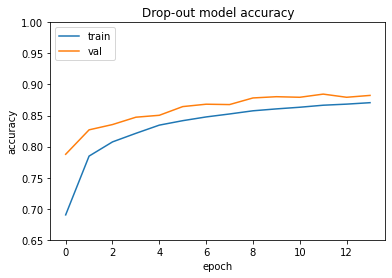

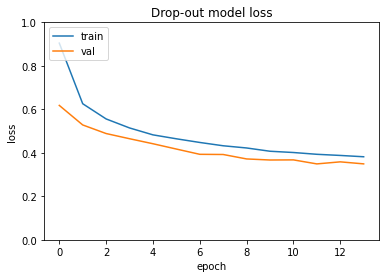

RuntimeError: ignored

In [195]:
#Plotting the accuracy
plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('Drop-out model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss
plt.plot(dropout_history.history['loss'])
plt.plot(dropout_history.history['val_loss'])
plt.title('Drop-out model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Getting the score from the testing
dropout_score = dropout_model.evaluate(test_images, to_categorical(test_labels))
print('Drop-out model test loss:', dropout_score[0])
print('Drop-out model accuracy:', dropout_score[1])


In [157]:
dropout_model.save("dropout_model")

INFO:tensorflow:Assets written to: dropout_model/assets


In [161]:
#Model3 MaxPooling model architecture
maxpool_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

maxpool_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 6)        0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 576)               0         
                                                                 
 dense_42 (Dense)            (None, 120)             

In [162]:
maxpool_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
maxpool_history=maxpool_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 22s 58ms/step - loss: 0.7617 - accuracy: 0.7490 - val_loss: 0.5236 - val_accuracy: 0.8299
Epoch 2/14
375/375 [==============================] - 20s 54ms/step - loss: 0.4858 - accuracy: 0.8461 - val_loss: 0.4463 - val_accuracy: 0.8629
Epoch 3/14
375/375 [==============================] - 21s 57ms/step - loss: 0.4276 - accuracy: 0.8639 - val_loss: 0.4153 - val_accuracy: 0.8662
Epoch 4/14
375/375 [==============================] - 20s 53ms/step - loss: 0.3954 - accuracy: 0.8727 - val_loss: 0.3976 - val_accuracy: 0.8723
Epoch 5/14
375/375 [==============================] - 24s 64ms/step - loss: 0.3737 - accuracy: 0.8799 - val_loss: 0.3732 - val_accuracy: 0.8797
Epoch 6/14
375/375 [==============================] - 26s 70ms/step - loss: 0.3572 - accuracy: 0.8840 - val_loss: 0.3619 - val_accuracy: 0.8839
Epoch 7/14
375/375 [==============================] - 21s 57ms/step - loss: 0.3405 - accuracy: 0.8890 - val_loss: 0.3627 - val_accuracy:

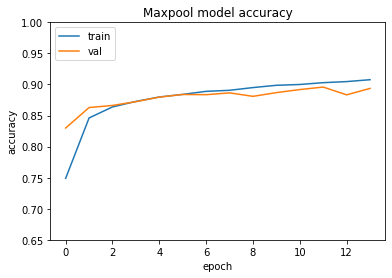

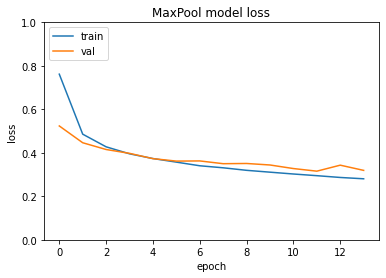

313/313 [==============================] - 3s 9ms/step - loss: 0.3300 - accuracy: 0.8923
Maxpool model test loss: 0.3299887776374817
Maxpool model test accuracy: 0.892300009727478


In [194]:
#Plotting the accuracy
plt.plot(maxpool_history.history['accuracy'])
plt.plot(maxpool_history.history['val_accuracy'])
plt.title('Maxpool model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss
plt.plot(maxpool_history.history['loss'])
plt.plot(maxpool_history.history['val_loss'])
plt.title('MaxPool model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Getting the score from the testing
maxpool_score = maxpool_model.evaluate(test_images, to_categorical(test_labels))
print('Maxpool model test loss:', maxpool_score[0])
print('Maxpool model test accuracy:', maxpool_score[1])

In [164]:
maxpool_model.save("maxpool_model")

INFO:tensorflow:Assets written to: maxpool_model/assets


In [165]:
#Model4 More filters model architecture
filter_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                      
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

filter_model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 average_pooling2d_26 (Avera  (None, 15, 15, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_27 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 flatten_15 (Flatten)        (None, 2304)              0         
                                                                 
 dense_45 (Dense)            (None, 120)             

In [166]:
filter_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filter_history=filter_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 49s 128ms/step - loss: 0.7792 - accuracy: 0.7574 - val_loss: 0.5418 - val_accuracy: 0.8273
Epoch 2/14
375/375 [==============================] - 52s 139ms/step - loss: 0.5040 - accuracy: 0.8387 - val_loss: 0.4728 - val_accuracy: 0.8500
Epoch 3/14
375/375 [==============================] - 49s 130ms/step - loss: 0.4500 - accuracy: 0.8568 - val_loss: 0.4328 - val_accuracy: 0.8653
Epoch 4/14
375/375 [==============================] - 46s 122ms/step - loss: 0.4213 - accuracy: 0.8643 - val_loss: 0.4114 - val_accuracy: 0.8723
Epoch 5/14
375/375 [==============================] - 43s 116ms/step - loss: 0.3981 - accuracy: 0.8733 - val_loss: 0.4039 - val_accuracy: 0.8726
Epoch 6/14
375/375 [==============================] - 44s 118ms/step - loss: 0.3838 - accuracy: 0.8756 - val_loss: 0.3887 - val_accuracy: 0.8759
Epoch 7/14
375/375 [==============================] - 44s 117ms/step - loss: 0.3680 - accuracy: 0.8822 - val_loss: 0.3697 - val_ac

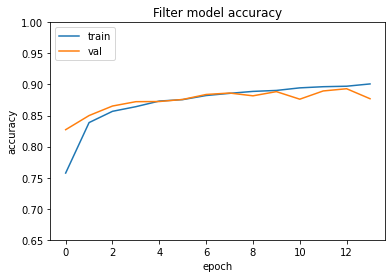

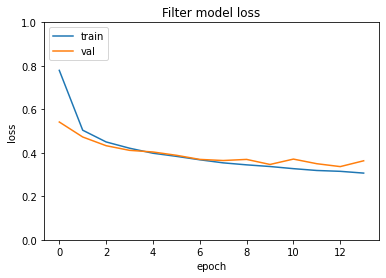

313/313 [==============================] - 4s 12ms/step - loss: 0.3791 - accuracy: 0.8704
Filter model test loss: 0.3791392147541046
Filter model test accuracy: 0.8704000115394592


In [193]:
#Plotting the accuracy
plt.plot(filter_history.history['accuracy'])
plt.plot(filter_history.history['val_accuracy'])
plt.title('Filter model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss
plt.plot(filter_history.history['loss'])
plt.plot(filter_history.history['val_loss'])
plt.title('Filter model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Getting the score from the testing
filter_score = filter_model.evaluate(test_images, to_categorical(test_labels))
print('Filter model test loss:', filter_score[0])
print('Filter model test accuracy:', filter_score[1])

In [170]:
filter_model.save("filter_model")

INFO:tensorflow:Assets written to: filter_model/assets


In [171]:
#Model5 1 more convolutional layer model architecture
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1), kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),   
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.AveragePooling2D(),                   
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

conv_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_31 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_32 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_37 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_33 (Avera  (None, 2, 2, 32)       

In [172]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_history=conv_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

Epoch 1/14
375/375 [==============================] - 26s 67ms/step - loss: 1.0662 - accuracy: 0.6557 - val_loss: 0.7912 - val_accuracy: 0.7211
Epoch 2/14
375/375 [==============================] - 20s 53ms/step - loss: 0.7576 - accuracy: 0.7364 - val_loss: 0.7264 - val_accuracy: 0.7423
Epoch 3/14
375/375 [==============================] - 19s 52ms/step - loss: 0.7041 - accuracy: 0.7520 - val_loss: 0.6778 - val_accuracy: 0.7548
Epoch 4/14
375/375 [==============================] - 20s 52ms/step - loss: 0.6656 - accuracy: 0.7692 - val_loss: 0.6561 - val_accuracy: 0.7709
Epoch 5/14
375/375 [==============================] - 20s 52ms/step - loss: 0.6382 - accuracy: 0.7789 - val_loss: 0.6464 - val_accuracy: 0.7745
Epoch 6/14
375/375 [==============================] - 20s 54ms/step - loss: 0.6174 - accuracy: 0.7880 - val_loss: 0.5942 - val_accuracy: 0.7986
Epoch 7/14
375/375 [==============================] - 19s 52ms/step - loss: 0.5928 - accuracy: 0.8011 - val_loss: 0.5947 - val_accuracy:

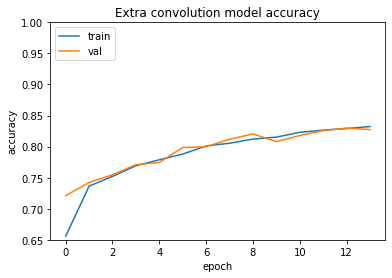

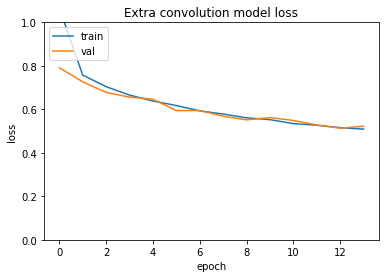

313/313 [==============================] - 3s 9ms/step - loss: 0.5446 - accuracy: 0.8198
Extra convolution model test loss: 0.5445637702941895
Extra convolution model test accuracy: 0.8198000192642212


In [192]:
#Plotting the accuracy
plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Extra convolution model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.65, 1])
plt.show()

#Plotting the loss
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Extra convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0, 1])
plt.show()

#Getting the score from the testing
conv_score = conv_model.evaluate(test_images, to_categorical(test_labels))
print('Extra convolution model test loss:', conv_score[0])
print('Extra convolution model test accuracy:', conv_score[1])

In [ ]:
conv_model.save("conv_model")